In [5]:
#part one: compute the jaccard similarity
#https://github.com/VipanchiKatthula/Jaccard_Cosine_Similarity/blob/master/Jaccard_and_Cosine_Similarity.ipynb
%pip install nltk

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd

In [2]:
#load the file
df_hsien = pd.read_csv('/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_4_eng_version_hsien.csv')
df_google = pd.read_csv('/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_4_eng_version_google.csv')
df_yiyun = pd.read_csv('/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_4_eng_version_yiyun.csv')
df_google = df_google.drop('Unnamed: 0', axis=1)
df_hsien.columns = ['English_Verse']
df_yiyun.columns = ['English_Verse']
df_google.columns = ['English_Verse']
type(df_hsien)

pandas.core.frame.DataFrame

In [3]:
#convert lists of lists:
def lists_of_lists(lists):
    return [item for sublist in lists for item in sublist]

In [4]:
#computation of jaccard similarities
def jaccard_similarities(list1, list2):
    intersections = len(set(list1).intersection(set(list2)))
    unions = len(set(list1).union(set(list2)))
    return (intersections/unions)*100

In [5]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('punkt')
nltk.download('stopwords')





[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wangxuechun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangxuechun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
#data cleaning
def data_cleaning(text):
    tokens = word_tokenize(text)
    #remove the punctuation and convert all to the lower case
    tokens = [token.lower() for token in tokens if token.isalpha()]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in tokens if word not in stop_words]
    return filtered_text


hsien_lists = df_hsien['English_Verse'].apply(data_cleaning)
google_lists = df_google['English_Verse'].apply(data_cleaning)
yiyun_lists = df_yiyun['English_Verse'].apply(data_cleaning)
hsien_list = lists_of_lists(hsien_lists)
google_list = lists_of_lists(google_lists)
yiyun_list = lists_of_lists(yiyun_lists)

In [7]:
#implementation phase
js_yg = jaccard_similarities(yiyun_list, google_list)
js_hg = jaccard_similarities(hsien_list,google_list)
js_hy = jaccard_similarities(hsien_list, yiyun_list)

print(js_yg, js_hg, js_hy)



18.58974358974359 21.49532710280374 26.126126126126124


In [8]:
#semantic analysis cosine similarity
hsien_list      = ','.join(str(v) for v in hsien_list)
google_list    = ','.join(str(v) for v in google_list)
yiyun_list    = ','.join(str(v) for v in yiyun_list)

In [9]:
%pip install scikit-learn

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
#Calculating Cosine Similarity through TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

doc = [hsien_list, yiyun_list, google_list]

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(doc)
words = vectorizer.get_feature_names_out()
similarity_matrix = cosine_similarity(tfidf)

print(similarity_matrix)

[[1.         0.33609327 0.50282451]
 [0.33609327 1.         0.30499986]
 [0.50282451 0.30499986 1.        ]]


In [11]:
#Keybert - extract keyword
%pip install keybert

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
from keybert import KeyBERT
km_model = KeyBERT()

In [12]:
#extract keyword from chapter 4
df_hsien_texts = df_hsien['English_Verse'].tolist()
df_yiyun_texts = df_yiyun['English_Verse'].tolist()
df_google_texts = df_google['English_Verse'].tolist()
keywords = []
for text in df_hsien_texts:
    extracted_keywords = km_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english')
    keywords.append(extracted_keywords)
print(keywords)


[[('victory', 0.3793), ('victors', 0.3656), ('surrendered', 0.351), ('triumph', 0.3256), ('rival', 0.3121)], [('fly', 0.4497), ('light', 0.4108), ('elated', 0.2952), ('look', 0.2642), ('ah', 0.1349)], [('nun', 0.4271), ('snored', 0.4183), ('flew', 0.3269), ('finger', 0.2598), ('victory', 0.256)], [('sonless', 0.5798), ('die', 0.2846), ('ah', 0.0955)], [('sonless', 0.2803), ('teachings', 0.2527), ('wife', 0.2264), ('ought', 0.211), ('descendants', 0.206)], [('monk', 0.3812), ('woman', 0.3592), ('paws', 0.3521), ('thought', 0.1073)], [('fingers', 0.2895), ('asleep', 0.2687), ('soft', 0.2443), ('thinking', 0.1925), ('evening', 0.1869)], [('woman', 0.5084), ('menace', 0.4291), ('mankind', 0.3863)], [('shang', 0.4679), ('chinese', 0.3642), ('chan', 0.341), ('cho', 0.3034), ('chin', 0.2992)], [('nuns', 0.4837), ('monks', 0.4243), ('heretics', 0.4008), ('nun', 0.3944), ('morals', 0.3576)], [('nun', 0.5241), ('odiousness', 0.3115), ('headedness', 0.2718), ('woman', 0.2481), ('hateful', 0.2231)

In [13]:
keywords_google = []
for text in df_google_texts:
    extracted_keywords = km_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english')
    keywords_google.append(extracted_keywords)
print(keywords_google)


[[('victory', 0.4794), ('proud', 0.4192), ('winners', 0.3988), ('crowned', 0.395), ('overcome', 0.3263)], [('flying', 0.5399), ('seeing', 0.3646)], [('finger', 0.4655), ('fingers', 0.454), ('thumb', 0.4208), ('slippery', 0.3892), ('snore', 0.3022)], [('grandson', 0.4907), ('broken', 0.3516), ('son', 0.3399)], [('piety', 0.265), ('thoughts', 0.2628), ('sentence', 0.2609), ('filial', 0.2461), ('ghost', 0.2451)], [('women', 0.4972), ('thought', 0.2537)], [('monk', 0.4618), ('woman', 0.302), ('women', 0.2894), ('moves', 0.2582), ('thought', 0.1071)], [('snoring', 0.4943), ('female', 0.2953), ('slippery', 0.2796), ('fingers', 0.2515), ('fluttered', 0.2459)], [('harmful', 0.4741), ('women', 0.3903), ('know', 0.2221)], [('zhou', 0.4953), ('shang', 0.4864), ('zhuo', 0.451), ('qin', 0.4264), ('chinese', 0.3541)], [('fanny', 0.3132), ('doctrine', 0.2472), ('monk', 0.2443), ('righteousness', 0.2433), ('nun', 0.2407)], [('nun', 0.503), ('nuns', 0.4482), ('heresy', 0.3106), ('fluttering', 0.3061), 

In [13]:
keywords_yiyun = []
for text in df_yiyun_texts:
    extracted_keywords = km_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english')
    keywords_yiyun.append(extracted_keywords)
print(keywords_yiyun)


[[('victory', 0.4304), ('overcoming', 0.3769), ('conquest', 0.3725), ('superiority', 0.3711), ('slain', 0.3658)], [('snoring', 0.4942), ('nun', 0.4415), ('forefinger', 0.3588), ('thumb', 0.297), ('lain', 0.2796)], [('descendants', 0.4364), ('scripture', 0.4183), ('ancient', 0.3109), ('grave', 0.2777), ('dying', 0.2596)], [('woman', 0.4018), ('thought', 0.204)], [('goose', 0.5018), ('sauce', 0.3668), ('woman', 0.2876), ('thought', 0.1582)], [('snoring', 0.5754), ('asleep', 0.275), ('evening', 0.1403), ('fingertips', 0.1308), ('fell', 0.11)], [('women', 0.4279), ('evil', 0.4067), ('proof', 0.3494), ('irrefutable', 0.3482), ('root', 0.2002)], [('shang', 0.4352), ('zhou', 0.4243), ('zhuo', 0.363), ('qin', 0.3449), ('concubine', 0.3319)], [('nuns', 0.3534), ('heretics', 0.338), ('monks', 0.3303), ('nun', 0.3022), ('ordained', 0.2503)], [('confucius', 0.4579), ('nun', 0.452), ('confucian', 0.3608), ('veiled', 0.3391), ('bewitchingly', 0.3144)], [('woman', 0.5064), ('thinking', 0.38), ('ah', 

In [21]:
df_yiyun_chap5 = pd.read_csv('/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_5_eng_version_yiyun.csv')
df_yiyun_chap5.rename(columns={'English_Verse_chap5_yiyun': 'English_Verse'}, inplace=True)
df_yiyun_all = pd.concat([df_yiyun, df_yiyun_chap5], ignore_index=True)
df_yiyun_all

,English_Verse
0,"There are, it is said, some victors who deligh..."
1,See him now: walking on air after a busy day o...
2,‘May you die without descendants!’ echoed in t...
3,‘Woman...’ he thought. ‘Must... find... woman...
4,"‘Sauce for the goose...’ he thought some more,..."
...,...
63,"‘What’s that under there, then?’ The old nun i..."
64,"‘Reckon they’re yours, do you? Do they answer ..."
65,"Ah-Q broke into a run, pursued by a sizeable b..."
66,"Afraid the dog might be set loose on him, Ah-Q..."


In [26]:
%pip install gensim


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 KB 4.8 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [34]:
import gensim
from gensim.utils import simple_preprocess

In [49]:
from gensim.utils import simple_preprocess
stop_words = stopwords.words('english')
newStopWords = ["ah", "q", "i"]
stop_words.extend(newStopWords)

def remove_stopwords(tweets):
    return [[word for word in gensim.utils.simple_preprocess(str(tweet)) if word not in stop_words] for tweet in tweets]

def tokenize(tweet):
    for word in tweet:
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))


def preprocessing(df):

  df['English_Verse'] = df['English_Verse'].str.lower()                                                      # Convert to lowercase
  df['English_Verse'] = df['English_Verse'].str.replace("[^a-zA-Z#]", " ")                                   # Remove punctuations
  df['English_Verse'] = df['English_Verse'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))     # Remove short words
  df['Tweet tokens'] = list(tokenize(df['English_Verse']))
  df['tokens_no_stop'] = remove_stopwords(df['English_Verse'])
  df['tokens_no_stop_joined'] = df['English_Verse'].apply(lambda x: ' '.join([word for word in x.split(' ') if word not in stop_words]))
  return df

def retrieve_text(df):
  doc = '. '.join(df['tokens_no_stop_joined'])
  return doc

def ngrams_series_func(data, n):
  
  wordList = re.sub("[^\w]", " ",  data).split()
  ngrams_series = (pd.Series(nltk.ngrams(wordList, n)).value_counts())[:10]
  return ngrams_series
     

In [50]:
df_ngrams_yiyun = pd.DataFrame(df_yiyun_all)
df_ngrams_yiyun = preprocessing(df_ngrams_yiyun)
df_ngrams_yiyun


,English_Verse,Tweet tokens,tokens_no_stop,tokens_no_stop_joined
0,"there are, said, some victors delight only vic...","[there, are, said, some, victors, delight, onl...","[said, victors, delight, victory, worthy, adve...","are, said, victors delight victory worthy adve..."
1,now: walking after busy moral victory! this la...,"[now, walking, after, busy, moral, victory, th...","[walking, busy, moral, victory, latest, victor...",now: walking busy moral victory! latest victor...
2,‘may without descendants!’ echoed cathedral ah...,"[may, without, descendants, echoed, cathedral,...","[may, without, descendants, echoed, cathedral,...",‘may without descendants!’ echoed cathedral ah...
3,‘woman...’ thought. ‘must... find... woman...,"[woman, thought, must, find, woman]","[woman, thought, must, find, woman]",‘woman...’ thought. ‘must... find... woman...
4,"‘sauce goose...’ thought some more, ‘... must....","[sauce, goose, thought, some, more, must, find...","[sauce, goose, thought, must, find, woman]","‘sauce goose...’ thought more, ‘... must... fi..."
...,...,...,...,...
63,"‘what’s that under there, then?’ indicated pro...","[what, that, under, there, then, indicated, pr...","[indicated, protuberance, beneath, jacket]","‘what’s there, then?’ indicated protuberance b..."
64,"‘reckon they’re yours, you? they answer call t...","[reckon, they, re, yours, you, they, answer, c...","[reckon, answer, call]","‘reckon they’re yours, you? answer call them? ..."
65,"ah-q broke into run, pursued sizeable black us...","[ah, broke, into, run, pursued, sizeable, blac...","[broke, run, pursued, sizeable, black, usually...","ah-q broke run, pursued sizeable black usually..."
66,"afraid might loose him, ah-q gathered trophies...","[afraid, might, loose, him, ah, gathered, trop...","[afraid, might, loose, gathered, trophies, pic...","afraid might loose him, ah-q gathered trophies..."


In [51]:
text = retrieve_text(df_ngrams_yiyun)
print(text)

are, said, victors delight victory worthy adversaries; conquest weak stupid dust ashes mouths. others who, overcoming everything everyone path, field strewn corpses slain, obeisances surrendered; enemy left fight, friend celebrate then, then, feel desolate solitude victory. weakness ah-q, inexhaustible delight himself, susceptible living proof, perhaps, global superiority chinese civilization.. now: walking busy moral victory! latest victory, however, bring unusual twist tail. eventually, floated temple earth grain, where, according well-established custom, immediately lain begun snoring. inexplicably, however, particular evening difficulty keeping eyes closed. something curious thumb forefinger: felt softer, silkier usual. something nun’s face attached fingers, face rubbed smooth?. ‘may without descendants!’ echoed cathedral ah-q’s mind. ‘she’s quite right,’ thought himself. ought woman. without descendants, i’ll offer bowl rice grave... woman’s need.’ words ancient sages: ‘there thre

Text(0, 0.5, '')

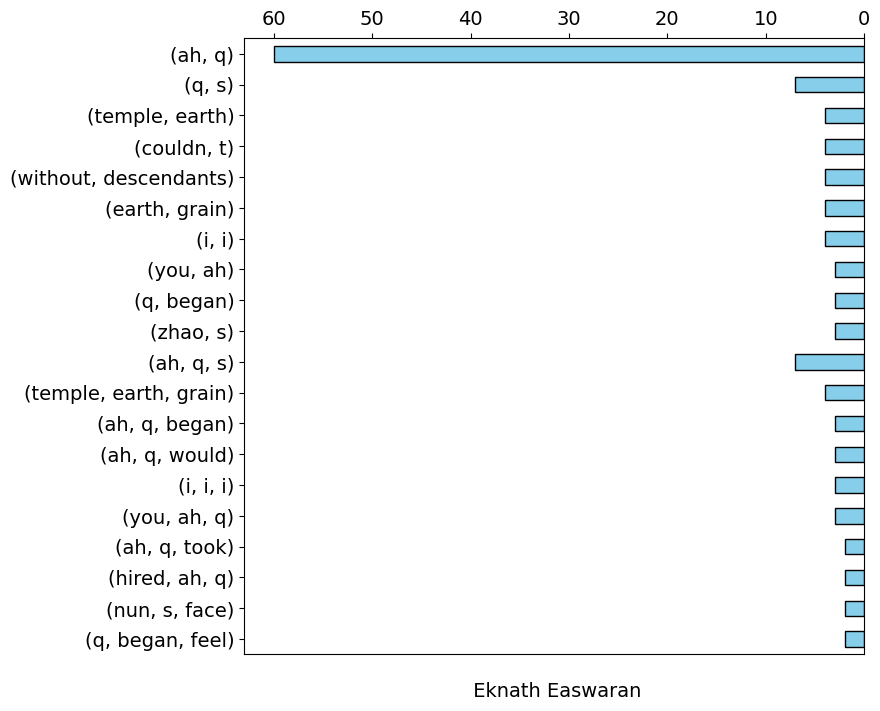

In [48]:
bigram1 = ngrams_series_func(text, 2)
trigram1 = ngrams_series_func(text, 3)



ngram1 = pd.concat([bigram1, trigram1])
barstyle = {'width': 0.5, 'edgecolor': 'black'}

plt.rcParams.update({'font.size': 14})
#fig, ax=plt.subplots(1,2, figsize=(16,8), gridspec_kw = {'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})
fig, ax=plt.subplots(1,1, figsize=(8,8))

#barh_ax = ax[0]
barh_ax = ax

ngram1[::-1].plot.barh(ax=barh_ax, color= 'skyblue',**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('\n Eknath Easwaran')
barh_ax.set_ylabel('',fontsize=50)